### Acidentes em rodovias federais - 2007 a 2020 
#### (Projeto de Governança de TI)

<img src="img/rodovia.jpg" width="80%" height="80%">

As rodovias federais são rotas de tráfego intenso que conectam as diferentes regiões do país, e muitas vezes estão associadas a altas velocidades e condições de tráfego desafiadoras. Os acidentes em rodovias federais são uma preocupação constante, dada a natureza do tráfego, a variedade de fatores que podem contribuir para esses acidentes e as consequências graves que eles podem trazer.
Iremos análisar alguns dados desses acidentes.

#### Obtenção dos dados.

Os dados foram obtidos no kaggle, site onde há um grande acervo de bases de dados, através do link: https://www.kaggle.com/datasets/marcosfnlr/acidentes-em-rodovias-federais-20072020

#### Váriáveis:

dados -> Variável que recebe os dados importados.

acidentes_por_mes -> Variável que recebe o agrupamento de acidentes por mês

percent_acidentes_por_hora -> Variável que recebe valor percentual dos acidentes por hora.

maiores_acidentes -> Váriavel que recebe os dez horários com mais acidentes percentualmente.

contagem_uf -> Recebe o percentual acidentes por de UFs.

contagem_causas -> Recebe o percentual acidentes por de causas de acidente.

principais_causas -> Váriavel que recebe as cinco causas com mais acidentes percentualmente.

equação -> Gera a equação para a linha linear (Regressão linear)

correlação -> Captura a correlação entre os dois valores

linha_tendencia -> Cria a linha de tendência

texto -> Monta o texto para apresenta os resultados dentro do gráfico


### Importação e leitura dos dados

Importando bibliotecas:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

NumPy é uma biblioteca voltada à computação numérica. Ela oferece suporte para operações matemáticas em matrizes e arrays multidimensionais, tornando-a uma escolha popular para a análise de dados científicos e numéricos.

O Pandas é uma biblioteca para manipulação e análise de dados.

Matplotlib.pyplot é uma biblioteca para criação de visualizações de dados.

A biblioteca Seaborn serve para visualização de dados estatísticos.

Plotly.express é uma biblioteca de criação de visualizações interativas de dados.

Base de dados importada:

In [9]:
#Importando arquivo de texto.
dados = pd.read_csv("base_de_dados/acidentes2007-2020.csv", index_col=None)
dados.head()

C:\Users\AGJ\AppData\Local\Temp\ipykernel_14164\181516455.py:2: DtypeWarning: Columns (6,7,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv("base_de_dados/acidentes2007-2020.csv", index_col=None)


,Unnamed: 0,id,id_unico,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,0,10,102007-06-11,segunda,15:30:00,MG,381,623.2,OLIVEIRA,falta de atenção,...,0,5,0,4,6,NaN,NaN,NaN,NaN,NaN
1,1,1032898,10328982007-08-13,segunda,14:25:00,MG,40,585.5,ITABIRITO,outras,...,1,2,0,1,1,NaN,NaN,NaN,NaN,NaN
2,2,1051130,10511302007-02-12,segunda,02:10:00,MA,135,11.0,SAO LUIS,animais na pista,...,1,0,0,3,1,NaN,NaN,NaN,NaN,NaN
3,3,1066824,10668242007-11-20,terça,05:30:00,CE,222,30.8,CAUCAIA,defeito mecânico no veículo,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
4,4,1069918,10699182007-12-16,domingo,17:40:00,MA,230,14.0,BARAO DE GRAJAU,outras,...,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN


In [10]:
dados.isnull().sum()

Unnamed: 0                      0
id                              0
id_unico                        0
dia_semana                      0
horario                         0
uf                              0
br                            513
km                            513
municipio                       0
causa_acidente                  0
tipo_acidente                  12
classificacao_acidente         24
fase_dia                        1
sentido_via                     0
condicao_metereologica          3
tipo_pista                     10
tracado_via                     0
uso_solo                        0
pessoas                         0
mortos                          0
feridos_leves                   0
feridos_graves                  0
ilesos                          0
ignorados                       0
feridos                         0
veiculos                        0
latitude                  1562165
longitude                 1562165
regional                  1562165
delegacia     

As colunas latitude, longitude, regional, delegacia e uop não possuem nenhum dado, então iremos remover.
A coluna Unnamed: 0 é apenas o indice da tabela, também será removida.

In [11]:
dados = dados.drop(["Unnamed: 0","latitude","longitude","regional","delegacia","uop"], axis=1)

In [12]:
#Verificando a nova tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851865 entries, 0 to 1851864
Data columns (total 25 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   id                      int64 
 1   id_unico                object
 2   dia_semana              object
 3   horario                 object
 4   uf                      object
 5   br                      object
 6   km                      object
 7   municipio               object
 8   causa_acidente          object
 9   tipo_acidente           object
 10  classificacao_acidente  object
 11  fase_dia                object
 12  sentido_via             object
 13  condicao_metereologica  object
 14  tipo_pista              object
 15  tracado_via             object
 16  uso_solo                object
 17  pessoas                 int64 
 18  mortos                  int64 
 19  feridos_leves           int64 
 20  feridos_graves          int64 
 21  ilesos                  int64 
 22  ignorados         

Nesta base a coluna "id_unico" refere-se a data do ocorrido, porém a mesma está concatenada com a coluna "id", iremos remover os caracteres da coluna "id" da coluna "id_unico" e renomeá-la para "data".

In [13]:
#Identificando os valores presentes na coluna id e removendo-os da coluna id_unico
dados = dados.astype({"id":str})
for ind,val in enumerate(dados["id"]):
    dados.loc[ind,"id_unico"] = dados.loc[ind,"id_unico"].replace(val,"",1)

#Renomeando a coluna id_unico
dados = dados.rename(columns={"id_unico": "data"})

#Definindo o formato da coluna data como data
dados["data"] = pd.to_datetime(dados["data"],format='%Y-%m-%d')
dados['ano'] = dados['data'].dt.year
dados['mes'] = dados['data'].dt.month
dados['dia'] = dados['data'].dt.day

dados.head(0)

,id,data,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,ano,mes,dia


### Análisando os dados

#### Quantidade de acidentes ao longo dos anos.

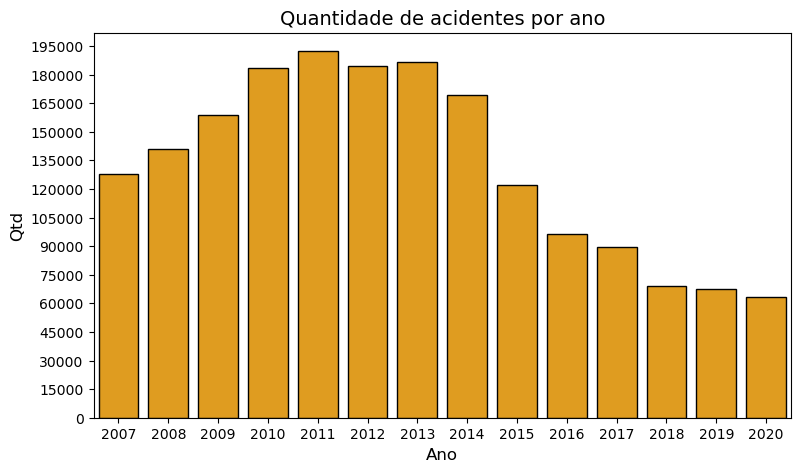

In [14]:
#Montando figura
plt.figure(figsize=(9,5));
plt.title("Quantidade de acidentes por ano",fontsize=14);

#Contabilizando a quantidade de ocorrências por ano
sns.countplot(data = dados, x='ano',color="orange",edgecolor='black');

#Definindo range do eixo Y
plt.yticks(ticks=range(0,200000,15000))

#Nomeando eixo X e Y e definido o tamanho da fonte
plt.xlabel('Ano',fontsize=12);
plt.ylabel("Qtd",fontsize=12);


Há claramente um aumento no números de acidentes de 2007 à 2011, em seguida o número reduz até o mínimo em 2022 em conjunto com as melhorias em investimentos nas rodovias.

#### Linha de acidentes nos meses do ano

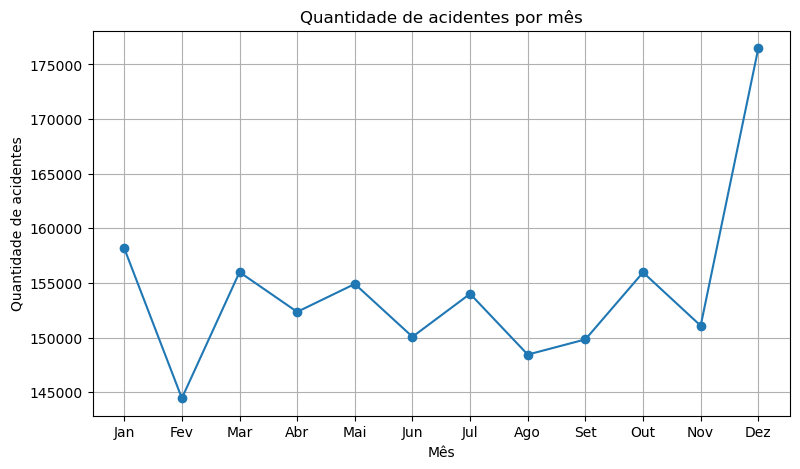

In [15]:
plt.figure(figsize=(9,5));
#Agrupando a quantidade de acidentes por mês
acidentes_por_mes = dados.groupby(['mes']).size().reset_index(name='quantidade')

#Criando o grafico de linhas
plt.plot(acidentes_por_mes['mes'], acidentes_por_mes['quantidade'], marker='o')

plt.title('Quantidade de acidentes por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de acidentes')
#Substituindo os valores do mês pela abreviação
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid()
plt.show()

O maior indice de acidentes ocorrem em dezembro, possivelmente pelo aumento de veiculos nas estradas no período de férias.
O inverso extremo, em fevereiro, seja pela diminuição deste fluxo com o retorno das escolas e trabalho.

#### Porcentagem de acidentes por horário

In [16]:
#Criando uma coluna para separar apenas a hora
dados['hora'] = dados['horario'].str[:2] + "h"

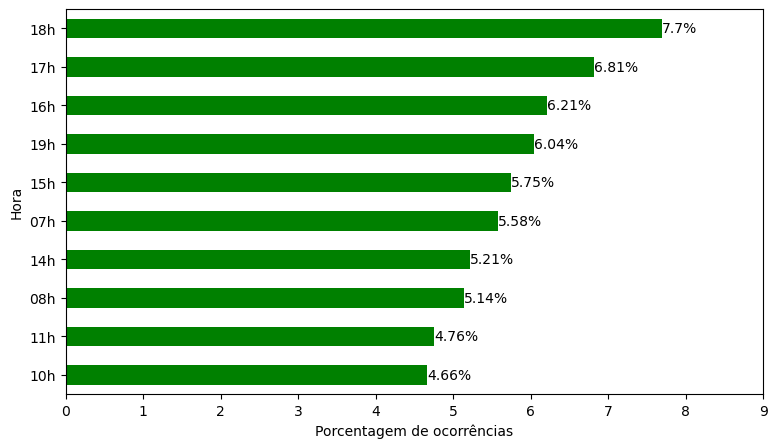

In [17]:
#Pegando o percentual de acidentes por hora
percent_acidentes_por_hora = dados['hora'].value_counts(normalize=True) * 100
#Obtendo as 10 horas com maior contagem de acidentes
maiores_acidentes = percent_acidentes_por_hora.nlargest(10).sort_values(ascending=True)

# criando o gráfico
plt.figure(figsize=(9,5));
ax = maiores_acidentes.plot(kind='barh', color='green', grid=False)
# adicionando os rótulos dos valores
for i, v in enumerate(maiores_acidentes):
    ax.annotate(str(round(v, 2)) + '%', xy=(v, i), ha='left', va='center')

ax.set_xlabel('Porcentagem de ocorrências')
ax.set_ylabel('Hora')
plt.xticks(ticks=range(0,10,1))
plt.show()

O período da tarde, próximo ao período noturno é onde há o maior número percentual de acidentes. É quando temos um aumento do fluxo de veículos, por conta das pessoas que estão voltando do trabalho para casa. Os motoristas já estão cansados, seja do batente no escritório, seja das horas seguidas ao volante e também o momento em que há uma queda gradual da luminosidade.

#### Porcentagem de acidentes por estado

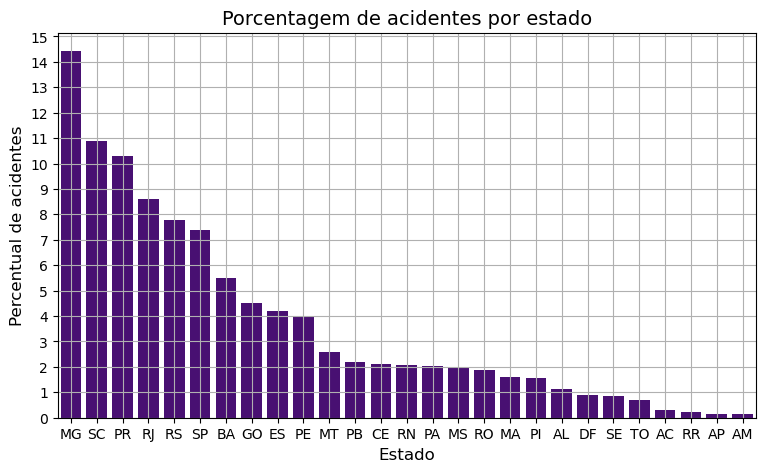

In [18]:
#Removendo dados nulos de UF
dados['uf'].replace("(null)",np.nan,inplace=True)
contagem_uf = dados['uf'].value_counts(normalize=True) * 100

estado=[]
qt_acidentes =[]

for estado in contagem_uf.index:
    qt_acidentes.append(contagem_uf[estado])

#Montando gráfico
plt.figure(figsize=(9,5))
plt.yticks(ticks=range(0,16,1))
plt.title("Porcentagem de acidentes por estado", fontsize=14)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Percentual de acidentes", fontsize=12)

sns.barplot(x=contagem_uf.index, y=qt_acidentes, color='indigo')
plt.grid()
plt.show()

Observa-se que o estados de Minas Gerais é onde se concentra o maior número de acidentes, seguido de SC, PR, RJ e RS. Interessante notar que todos os estados do sul do pais estão no top 5.

#### Principais causas dos acidentes

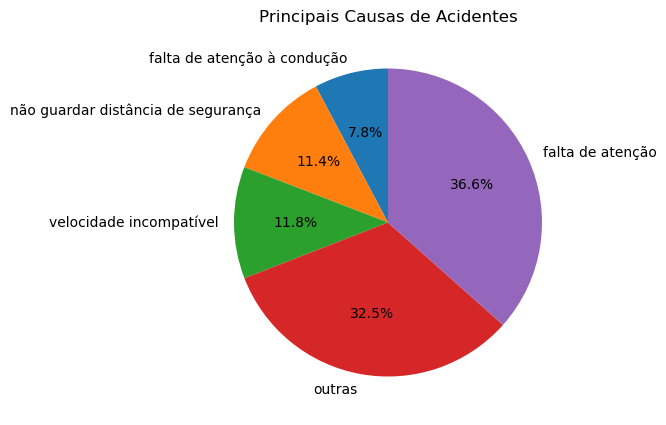

In [19]:
#Contabilizando causas
contagem_causas = dados['causa_acidente'].value_counts(normalize=True) * 100

#Classificando as principais causas
principais_causas = contagem_causas.nlargest(5).sort_values()
rotulos = principais_causas.index
contagem = principais_causas.values

# Criando o gráfico
plt.figure(figsize=(9, 5))
plt.pie(contagem, labels=rotulos, autopct='%1.1f%%', startangle=90)
plt.title('Principais Causas de Acidentes')
plt.show()

A principal causa do acidente é a falta de atenção, entretanto há uma quantidade relevante de acidentes não classificados, descrito como "outras", qual seria o motivo de não terem classificado o acidente de forma mais clara?

#### Quantidade de acidentes por tipo de traçado da via

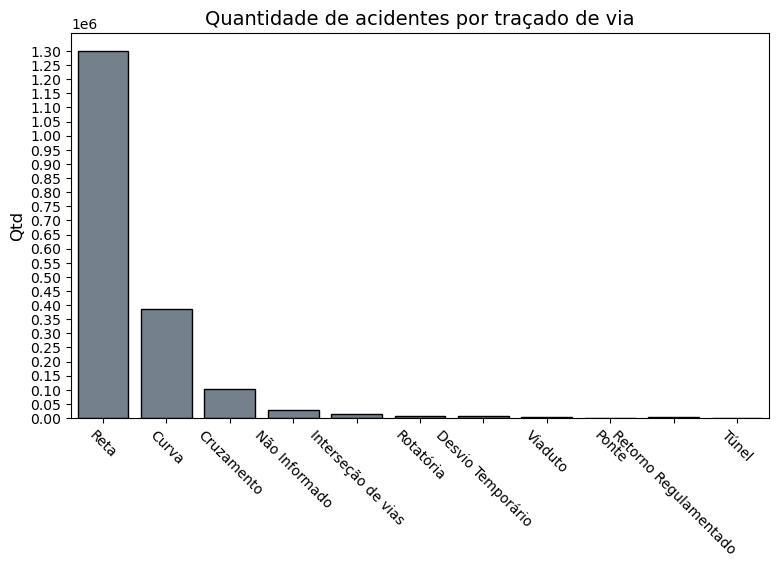

In [20]:
#Removendo dados nulos de tracado_via
dados['tracado_via'].replace("(null)",np.nan,inplace=True)

#Montando tabela
plt.figure(figsize=(9,5));
plt.title("Quantidade de acidentes por traçado de via",fontsize=14);

#Contabilizando a quantidade de ocorrências por ano
sns.countplot(data = dados, x='tracado_via',color="slategray",edgecolor='black');

plt.yticks(ticks=range(0,1350000,50000))
plt.xticks(rotation=-45)
plt.xlabel('',fontsize=12);
plt.ylabel("Qtd",fontsize=12);

O tipo de via que temos mais acidentes é em retas, provavelmente por ser o momento em que os veículos estão em maior velocidade e onde é comum ser feito ultrapassagens.

#### Será que quanto mais veiculos envolvidos, maior é número de mortes? Veremos abaixo.

C:\Users\AGJ\AppData\Local\Temp\ipykernel_14164\374339245.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'ob', color='dodgerblue')


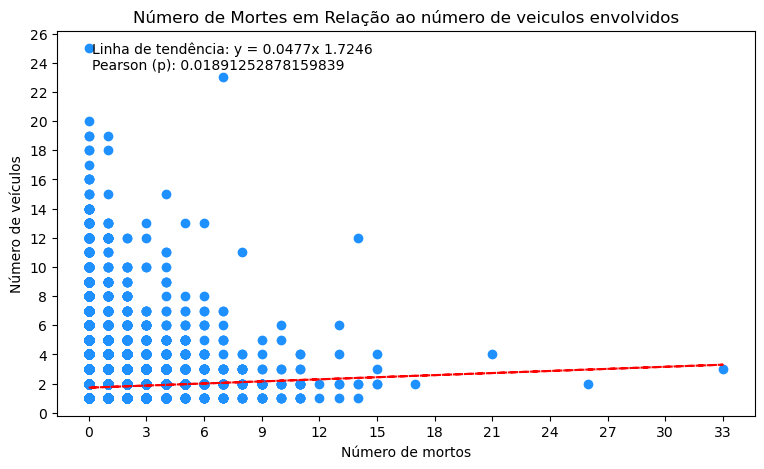

In [21]:
# Definição de x e y 
x = dados['mortos']
y = dados['veiculos']

# Gera a equação para a linha linear (Regressão linear)
equação = np.polyfit(x, y, 1)
# Captura a correlação entre os dois valores
correlação = np.corrcoef(x,y)[0][1]
# Cria a linha de tendência
linha_tendencia = np.poly1d(equação)

# Monta o texto para apresenta os resultados dentro do gráfico
texto = f'Linha de tendência: y = {equação[0]:.4f}x {equação[1]:.4f}'
texto += f'\nPearson (p): {correlação}'

# Define o tamanho da figura em polegadas
plt.figure(figsize=(9,5)) 

plt.title("Número de Mortes em Relação ao número de veiculos envolvidos")
plt.xlabel("Número de mortos")
plt.ylabel("Número de veículos")

plt.yticks(ticks=range(0,28,2))
plt.xticks(ticks=range(0,36,3))

plt.text(0.05, 0.9, texto, 
         transform=plt.gca().transAxes)
plt.plot(x, y, 'ob', color='dodgerblue')
plt.plot(x, linha_tendencia(x), 'r--')

plt.show()

Observamos que não existe uma relação da quantidade de veículos envolvidos com a quantidade de vitimas fatais, ocorre o inverso, quanto menos veiculos envolvidos, proporcionalmente o número de mortos é maior.

#### Conclusão:

Com base nos dados importados e tratados, nota-se que o número de acidentes em rodovias vem reduzindo ao longo dos anos, claro, estamos nos recuperando de um período onde o fluxo de pessoas e veiculos foi reduzido forçadamente por uma pandêmia, mas é de se acompanhar ao longo de mais tempo. Um acidente em rodovia ou em ruas podem ser gerados por diversos fatores, verificamos que o cansaço, displicência e falta de atenção é o que mais geram ocorrências em nossas rodovias, por isso, é preciso que as autoridades continuem trabalhando em investir nessas vias, buscando diminuir mais ainda os problemas que temos em nossas vias.

### Referências bibliográficas


1. GOV.BR, Investimentos privados e obras emblemáticas em rodovias aumentam segurança e diminuem distâncias no país, 2022. Disponível em: https://www.gov.br/infraestrutura/pt-br/assuntos/noticias/2022/12/investimentos-privados-e-obras-emblematicas-em-rodovias-aumentam-seguranca-e-diminuem-distancias-no-pais.

2. ALEXANDRE CARVALHO, Há um horário do dia com mais acidentes em rodovias?, 2022. Disponível em: https://super.abril.com.br/coluna/oraculo/ha-um-horario-do-dia-com-mais-acidentes-em-rodovias.

3. Agência Brasil, Minas é o estado com mais acidentes em rodovias federais no Brasil, 2022. Disponível em: https://www.hojeemdia.com.br/geral/minas-e-o-estado-com-mais-acidentes-em-rodovias-federais-no-brasil-1.899851.